In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set_palette("colorblind", 10)

## What is the business problem we want to tackle?

Given the growth of Cab industry in last years, the US company XYZ wants to know which of the two given cab companies can be a better opportunity to invest in, by having a deeper understaning of the market.

In [2]:
ls

Cab companies pairplot.png    Transaction_ID.csv
Cab_Data.csv                  US Cities Visted 2017.xlsx
City.csv                      US cities Visited 2018.xlsx
Customer_ID.csv               XYZ Cab Investment EDA.ipynb
README.md                     data.csv


In [3]:
cabData = pd.read_csv('Cab_Data.csv')
cityData = pd.read_csv('City.csv')
customersData = pd.read_csv('Customer_ID.csv')
transactionsData = pd.read_csv('Transaction_ID.csv')

## Data collection, quality and preprocessing

At first, I will be working with four datasets. It is also important to add value to our data when possible, so I will be searching for new data that may add attributes to our existing dataset. Then, everything will be merged into a single dataset that will let us work easily.

### Cab data

In [4]:
cabData.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
cabData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [6]:
cabData.iloc[:,4:].describe()

,KM Travelled,Price Charged,Cost of Trip
count,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113
std,12.233526,274.378911,157.993661
min,1.900000,15.600000,19.000000
25%,12.000000,206.437500,151.200000
50%,22.440000,386.360000,282.480000
75%,32.960000,583.660000,413.683200
max,48.000000,2048.030000,691.200000


In [7]:
cabData.iloc[:,2:4].nunique()

Company     2
City       19
dtype: int64

In [8]:
cabData['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [9]:
cabData['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [10]:
cabData['Date of Travel'] = pd.TimedeltaIndex(cabData['Date of Travel'], unit='d') + dt.datetime(1899, 12, 30)

In [11]:
cabData['Date of Travel'].describe(datetime_is_numeric=True)

count                           359392
mean     2017-08-17 01:37:55.042460416
min                2016-01-02 00:00:00
25%                2016-11-23 00:00:00
50%                2017-09-10 00:00:00
75%                2018-05-12 00:00:00
max                2018-12-31 00:00:00
Name: Date of Travel, dtype: object

In [12]:
# I will create a new column to compute the profit made for each trip
cabData['Profit'] = cabData['Price Charged'] - cabData['Cost of Trip']

In [13]:
cabData.sample(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
76930,10095316,2016-10-28,Pink Cab,LOS ANGELES CA,36.58,441.10,384.0900,57.0100
314080,10385640,2018-10-06,Yellow Cab,ATLANTA GA,18.24,322.00,218.8800,103.1200
303345,10372548,2018-09-07,Yellow Cab,LOS ANGELES CA,32.70,536.54,392.4000,144.1400
15818,10020131,2016-03-25,Yellow Cab,WASHINGTON DC,24.57,377.51,306.6336,70.8764
72315,10089870,2016-10-09,Yellow Cab,NEW YORK NY,7.84,179.25,97.8432,81.4068
125641,10154577,2017-03-17,Yellow Cab,CHICAGO IL,46.00,673.45,563.0400,110.4100
176256,10217089,2017-09-03,Yellow Cab,NEW YORK NY,33.25,813.79,454.8600,358.9300
74074,10091897,2016-10-16,Pink Cab,NEW YORK NY,3.39,62.40,35.5950,26.8050
90996,10111958,2016-11-21,Yellow Cab,SAN DIEGO CA,36.96,651.59,510.0480,141.5420
317474,10389647,2018-10-10,Yellow Cab,CHICAGO IL,14.70,206.63,199.3320,7.2980


In [14]:
cabData.duplicated().any()

False

### City data

In [15]:
cityData.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [16]:
cityData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [17]:
# updated populations - there seems to be some imbalances
cityData.Population = pd.Series([8336817,2693976,3979576,467963,3000000,3176000,1423851,1680992,1343573,506811,
727211,978908,753675,548073,881549,513624,300286,705749,670820,692600])

In [18]:
# population has been updated previously, now I will remove commas from users column
cityData['Users'] = cityData['Users'].str.replace(',','').astype(int)

In [19]:
cityData[['Population', 'Users']].describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.669103e+06,64520.650000
std,1.892012e+06,83499.375289
min,3.002860e+05,3643.000000
25%,6.401332e+05,11633.250000
50%,8.176120e+05,23429.000000
75%,1.934238e+06,91766.000000
max,8.336817e+06,302149.000000


### Customers data

In [20]:
customersData.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [21]:
customersData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [22]:
customersData.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [23]:
customersData.iloc[:,2:].describe()

,Age,Income (USD/Month)
count,49171.000000,49171.000000
mean,35.363121,15015.631856
std,12.599066,8002.208253
min,18.000000,2000.000000
25%,25.000000,8289.500000
50%,33.000000,14656.000000
75%,42.000000,21035.000000
max,65.000000,35000.000000


In [24]:
customersData.duplicated().any()

False

### Transactions data

In [25]:
transactionsData.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [26]:
transactionsData.duplicated().any()

False

In [27]:
transactionsData['Customer ID'].duplicated().any()

True

### Adding attributes

I will add some attributes from external sources to the data provided that will (hopefully) increase the value of the whole dataset and will help the model to find more accurate patterns in data.

I will create a few tables from which some functions will be retrieving values that will be add to the main dataframe. The attributes are the following:

- US federal holidays. Source: https://www.timeanddate.com/holidays/us
- Overseas tourists by year, that will be computed as monthly average. Source: travel.trade.gov and tourism.az.gov
- Unemployment rate by state. Source: https://www.bls.gov/lau/lastch18.htm
- Average monthly temperature by city (in degrees Celsius). Source: NCEI

In [28]:
# US federal holidays source: https://www.timeanddate.com/holidays/us/2019?hol=9
holidaysDates = pd.to_datetime(['2016-1-1', '2016-1-18', '2016-2-15', '2016-5-30', '2016-7-4', '2016-9-5', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26', '2017-1-1', '2017-1-2', '2017-1-16', '2017-1-20', '2017-2-20', '2017-5-29', '2017-7-4', '2017-9-4', '2017-10-9', '2017-11-10', '2017-11-11', '2017-11-23', '2017-12-25', '2018-1-1', '2018-1-15', '2018-2-19', '2018-5-28', '2018-7-4', '2018-9-3', '2018-10-8', '2018-11-11', '2018-11-12', '2018-11-22', '2018-12-24', '2018-12-25'], format='%Y-%m-%d')
holidays = pd.Series(data=np.ones(len(holidaysDates,), dtype=int), index=holidaysDates, name='holidays')

In [29]:
# tourism just for overseas visitors travel.trade.gov for tucson source: tourism.az.gov (estimation)
overseasTourists = pd.DataFrame(data=[[9800, 10084, 10557],
                                    [1466, 1537, 1524],
                                    [4977, 4766, 5073],
                                    [5379, 5101, 5137],
                                    [3571, 3443, 3522],
                                    [695, 665, 774],
                                    [1169, 1027, 1133],
                                    [301, 303, 315],
                                    [571, 517, 517],
                                    [725, 735, 710],
                                    [312, 303, 303],
                                    [226, 276, 276],
                                    [658, 731, 730],
                                    [187, 187, 187],
                                    [3571, 3443, 3522],
                                    [241, 257, 219],
                                    [139, 117, 117],
                                    [2090, 2128, 2038],
                                    [214, 226, 226],
                                    [1526, 1650, 1651]],
                               index=cityData.City,
                               columns=['2016 visitors', '2017 visitors', '2018 visitors'])
# average per month
overseasTourists = overseasTourists.apply(lambda x: (x*1000)/12).round(2)

In [30]:
# yearly unemployment rate by state - source: https://www.bls.gov/lau/lastch18.htm
unemploymentRate = pd.DataFrame(data=[[4.9, 4.6, 4.1],
                                    [5.9, 5.0, 4.4],
                                    [5.5, 4.8, 4.3],
                                    [4.9, 4.2, 3.6],
                                    [5.5, 4.8, 4.3],
                                    [5.5, 4.8, 4.3],
                                    [5.5, 4.8, 4.3],
                                    [5.5, 4.9, 4.8],
                                    [4.6, 4.3, 3.9],
                                    [5.4, 4.8, 4.0], 
                                    [3.1, 2.6, 3.0],
                                    [4.6, 4.3, 3.9],
                                    [5.2, 4.6, 4.4],
                                    [5.5, 4.9, 4.8],
                                    [5.5, 4.8, 4.3],
                                    [5.5, 4.8, 4.3],
                                    [5.3, 5.0, 4.4],
                                    [6.2, 6.1, 5.7],
                                    [4.7, 3.7, 3.5],
                                    [4.0, 3.8, 3.4]],
                               index=cityData.City,
                               columns=['2016 rate', '2017 rate', '2018 rate'])

In [31]:
# source: NCEI - average temperature by month in degrees Celsius
averageTemperature = pd.DataFrame(data=[[0.5,2,6,12.5,18,22.5,26,25,21,15,8.5,4],
                                       [-5,-3,3.5,9.5,16,21.5,24,23,19,12,4.5,-0.5],
                                       [15.5,15,16.5,18,18.5,21,23.5,24,24,21.5,17.5,14.5],
                                       [20.5,22,22.5,25.5,27,28.5,29,29.5,28.5,27,24,22.5],
                                       [12,12.5,13.5,14,14,15.5,16,16,17.5,17,14.5,12],
                                       [15.5,15,16.5,18,18.5,21,23.5,24,24,21.5,17.5,14.5],
                                       [15,15,16.5,17.5,18.5,19.5,21.5,22.5,22.5,21,17.5,14.5],
                                       [14,15.5,20,24,27,34,35,35,32,25.5,18.5,14],
                                       [8.5,10.5,15.5,20,24.5,29,31,31.5,27.5,21,14.5,10],
                                       [6.5,9.5,13.5,18,22.5,26,27,27,25,18.5,12.5,9.5],
                                       [0,-0.5,5.5,9,13,20.5,24,22.5,19,11,5,-0.5],
                                       [11,13.5,17.5,21,25,29,30,31.5,28,22.5,16,12.5],
                                       [6,6,8.5,10.5,14,17,19.5,20,17,12.5,8,5.5],
                                       [14,15.5,20,24,27,34,35,35,32,25.5,18.5,14],
                                       [12,12.5,13.5,14,14,15.5,16,16,17.5,17,14.5,12],
                                       [9,11,13,16,22.5,23,24.5,24,22.5,18.5,12.5,9],
                                       [-2.5,-0.5,4.5,11.5,17.5,21.5,23.5,22.5,19.5,13,5.5,1.5],
                                       [3,4.5,9,15.5,20.5,25,28,26.5,23.5,16.5,9.5,6],
                                       [3.5,6.5,11,16.5,21,26,27.5,26.5,23,16.5,10,7],
                                       [-1,0,4,9.5,15.5,20,24.5,23.5,19.5,14,7,2.5]],
                                 index=cityData.City,
                                 columns=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                                         'September', 'October', 'November', 'December'])

### Building applicable dataframe

Once I have all the data that I want to join, will go through the process until I get the final and applicable dataframe.

In [32]:
df1 = cabData.merge(cityData, on='City', how='left')
df2 = customersData.merge(transactionsData, on='Customer ID', how='right')

In [33]:
print(df1.columns)
print(df2.columns)

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Profit', 'Population', 'Users'],
      dtype='object')
Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)', 'Transaction ID',
       'Payment_Mode'],
      dtype='object')


In [34]:
df3 = df1.merge(df2, on='Transaction ID', how='left')

In [35]:
df3.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,506811,24701,29290,Male,28,10813,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,506811,24701,27703,Male,27,9237,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,506811,24701,28712,Male,53,11242,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,506811,24701,28020,Male,23,23327,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,506811,24701,27182,Male,33,8536,Card


In [36]:
# joining federal holidays to the dataframe
holidays.to_frame()
holidays = holidays.reset_index()
holidays.rename(columns={'index': 'date', 'holidays': 'Holidays'}, inplace=True)

df3 = df3.merge(holidays, left_on='Date of Travel', right_on='date', how='left')

df3['Holidays'] = df3['Holidays'].replace(np.nan, 0)
df3.drop('date', axis=1, inplace=True)

The functions below will retrieve data from the dataframes I created containing external data (visitors, unemployment rate and temperature), so that they will add values to the corresponding column given a specific criteria, like month or year and city.

In [37]:
def Visitors(i):
    year = df3.iloc[i]['Date of Travel'].year
    city = df3.iloc[i]['City']
    avg_visitors = overseasTourists[f'{year} visitors'][city]
    return avg_visitors

def Unemployment(i):
    year = df3.iloc[i]['Date of Travel'].year
    city = df3.iloc[i]['City']
    rate = unemploymentRate[f'{year} rate'][city]
    return rate

months_dict = dict()

for count, month in enumerate(averageTemperature.columns, start=1):
    months_dict[count] = month

def Temperature(i):
    month = df3.iloc[i]['Date of Travel'].month
    city = df3.iloc[i]['City']
    avg_temperature = averageTemperature[months_dict[month]][city]
    return avg_temperature

In [38]:
# creating the new columns -- DO NOT REMOVE!! --
#df3['Monthly Visitors'] = df3.apply(lambda row: Visitors(row.name), axis=1)
#df3['Unemployment Rate'] = df3.apply(lambda row: Unemployment(row.name), axis=1)
#df3['Avg Monthly Temperature'] = df3.apply(lambda row: Temperature(row.name), axis=1)

In [39]:
# DO NOT REMOVE!! --
#df3.Holidays = df3.Holidays.astype(int)

In [40]:
# saving the final dataframe as CSV file - ALREADY SAVED!!
#df3.to_csv('/Users/juancarlos/Proyectos/XYZ Cab Investment/data.csv', index=False)

## EDA

It is time to start exploring our data.

1. I will state several questions for which I will be exploring the data to be able to answer it.
2. I will have an overview of the data by going through descriptive statistics and correlations.
3. Answer the questions by plotting data or using contingency tables.

In [41]:
# Creating some columns takes a few minutes to process and to avoid that I will read the csv file straightforward
df = pd.read_csv('data.csv')

In [42]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Holidays,Monthly Visitors,Unemployment Rate,Avg Monthly Temperature
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,506811,24701,29290,Male,28,10813,Card,0,60416.67,5.4,6.5
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,506811,24701,27703,Male,27,9237,Card,0,60416.67,5.4,6.5
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,506811,24701,28712,Male,53,11242,Cash,0,60416.67,5.4,6.5
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,506811,24701,28020,Male,23,23327,Cash,0,60416.67,5.4,6.5
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,506811,24701,27182,Male,33,8536,Card,0,60416.67,5.4,6.5


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Transaction ID           359392 non-null  int64  
 1   Date of Travel           359392 non-null  object 
 2   Company                  359392 non-null  object 
 3   City                     359392 non-null  object 
 4   KM Travelled             359392 non-null  float64
 5   Price Charged            359392 non-null  float64
 6   Cost of Trip             359392 non-null  float64
 7   Profit                   359392 non-null  float64
 8   Population               359392 non-null  int64  
 9   Users                    359392 non-null  int64  
 10  Customer ID              359392 non-null  int64  
 11  Gender                   359392 non-null  object 
 12  Age                      359392 non-null  int64  
 13  Income (USD/Month)       359392 non-null  int64  
 14  Paym

In [44]:
# the dates changed its type to object, I'm going to put it correcly again
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'], format='%Y-%m-%d')

In [45]:
df['Date of Travel'].dtype

dtype('<M8[ns]')

### What do I want to know?

- How much profit does each company make? - year, city wise, profit per ride
- How many rides does each company go for? 
- What about usual customers by company? Which company is being able to retain more customers?
- Do cab rides change over the year? What's the trend along the three years? Do holidays affect rides? When do people use cabs more often during the week?
- Are there gender differences? - spending, km travelled, payment mode
- Are there age differences?
- Are there important differences by city? - like profit made, payment mode, rides per company
- Do overseas tourists, unemployment rate or average monthly temperature relate to the number of rides?

### Descriptive statistics

In [46]:
df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Age,Income (USD/Month),Holidays,Monthly Visitors,Unemployment Rate,Avg Monthly Temperature
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,137.253198,3.709778e+06,158365.582267,19191.652115,35.336705,15048.822937,0.027995,367592.869868,4.769763,14.886785
std,1.268058e+05,12.233526,274.378911,157.993661,160.311840,3.074874e+06,100850.051020,21012.412463,12.594234,7969.409482,0.164957,317436.788449,0.731340,8.470041
min,1.000001e+07,1.900000,15.600000,19.000000,-220.060000,3.002860e+05,3643.000000,1.000000,18.000000,2000.000000,0.000000,9750.000000,2.600000,-5.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,28.012000,7.057490e+05,80021.000000,2705.000000,25.000000,8424.000000,0.000000,127000.000000,4.300000,8.500000
50%,1.022104e+07,22.440000,386.360000,282.480000,81.962000,2.693976e+06,144132.000000,7459.000000,33.000000,14685.000000,0.000000,174166.670000,4.700000,16.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,190.030000,8.336817e+06,302149.000000,36078.000000,42.000000,21035.000000,0.000000,816666.670000,5.200000,21.500000
max,1.044011e+07,48.000000,2048.030000,691.200000,1463.966000,8.336817e+06,302149.000000,60000.000000,65.000000,35000.000000,1.000000,879750.000000,6.200000,35.000000


By seeing our descriptive stats, we have some interesting insights to start off:

- Profit is the column I created before from the difference between price and cost. It is remarkable that there are some trips that are not profitable. Actually, we have there are losses.
- There are big differences in population, due to the fact that we have different-size cities. There is a huge leap between NY (the biggest) and the second.

In [47]:
object_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in object_cols:
    print('>>>',col,'<<<')
    print(df[col].unique())
    print(df[col].value_counts(normalize=True))

>>> Company <<<
['Pink Cab' 'Yellow Cab']
Yellow Cab    0.764294
Pink Cab      0.235706
Name: Company, dtype: float64
>>> City <<<
['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC']
NEW YORK NY       0.277928
CHICAGO IL        0.157558
LOS ANGELES CA    0.133651
WASHINGTON DC     0.121697
BOSTON MA         0.082617
SAN DIEGO CA      0.057007
SILICON VALLEY    0.023704
SEATTLE WA        0.022251
ATLANTA GA        0.021027
DALLAS TX         0.019525
MIAMI FL          0.017958
AUSTIN TX         0.013623
ORANGE COUNTY     0.011080
DENVER CO         0.010643
NASHVILLE TN      0.008375
SACRAMENTO CA     0.006586
PHOENIX AZ        0.005743
TUCSON AZ         0.005373
PITTSBURGH PA     0.003653
Name: City, dtype: float64
>>> Gender <<<
['Male' 'Female']
Male      0.572945
Female 

From the total transactions, we can see the following:

- 76 % of total rides are run by Yellow Cab.
- 28 % of total rides are run in New York, followed by 16 % in Chicago.
- 57 % of our sample are men, 43 % are women.
- 60 % of total rides were paid by card.

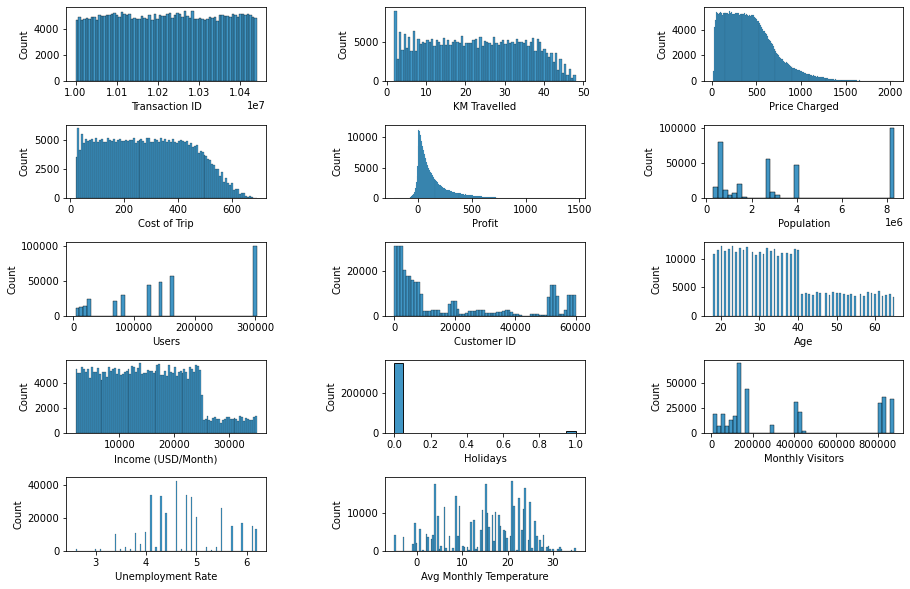

In [48]:
numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

fig = plt.figure(figsize=(15,10))

count=1

for col in numeric_cols:
    fig.add_subplot(5,3,count)
    sns.histplot(data=df, x=col)
    plt.subplots_adjust(hspace=0.6, wspace=0.6)
    
    count+=1
    
plt.show()

### Correlations

In [49]:
# IMAGE SAVED IN FOLDER - IT TAKES LONG TO RUN IT AGAIN
#cols = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Population', 'Users', 'Age', 'Income (USD/Month)',
       #'Holidays', 'Monthly Visitors', 'Unemployment Rate', 'Avg Monthly Temperature']

#sns.pairplot(data=df, x_vars=cols, y_vars=cols, corner=True, hue='Company', palette={'Pink Cab': 'pink', 'Yellow Cab': 'yellow'})

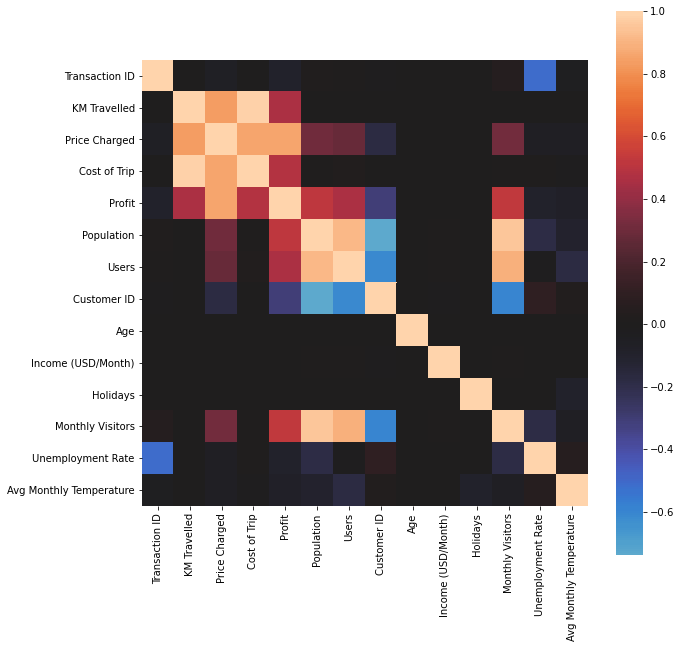

In [50]:
corr = df.corr()

fig = plt.figure(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, square=True, center=0)
plt.show()

Correlations:

- There are some expected correlations like: the bigger the price, the bigger the cost, and so the profit or the bigger the population, the bigger the profit is.
- Prices tend to be higher in most visited cities. Also means bigger cities.
- Unemployment rate has a slightly negative correlation with population and monthly visitors, meaning unemployment tends to be a bit slower in bigger cities.
- Average monthly temperature tends to be negatively correlated with the number of users in a city.

### Answering the questions

#### <i>Profit made by company</i>

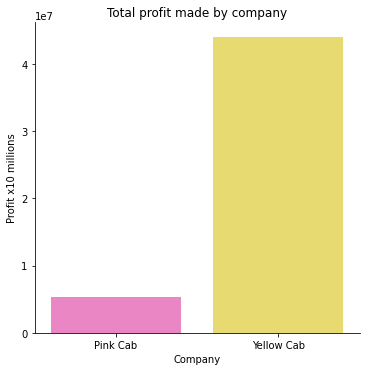

In [51]:
d = df.groupby('Company')['Profit'].sum().to_frame()

g = sns.catplot(x=d.index, y='Profit', data=d, kind='bar', palette=['#F976C7', '#FAE95D'])
plt.title('Total profit made by company')
plt.ylabel('Profit x10 millions')
plt.show()

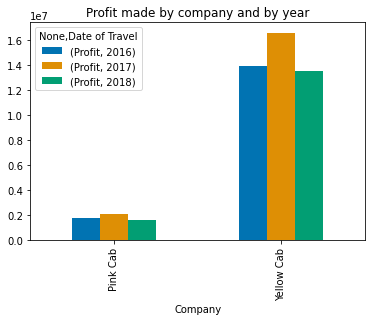

In [52]:
d = df.groupby([df['Date of Travel'].dt.year, 'Company'])['Profit'].sum().to_frame().unstack(level=0).plot(
    kind='bar', 
    subplots=False, 
    title='Profit made by company and by year')

Yellow Cab is by far the most profitable company. 2017 was the most profitable year for both cab companies. Yellow Cab makes around 8 times more profit than Pink Cab.

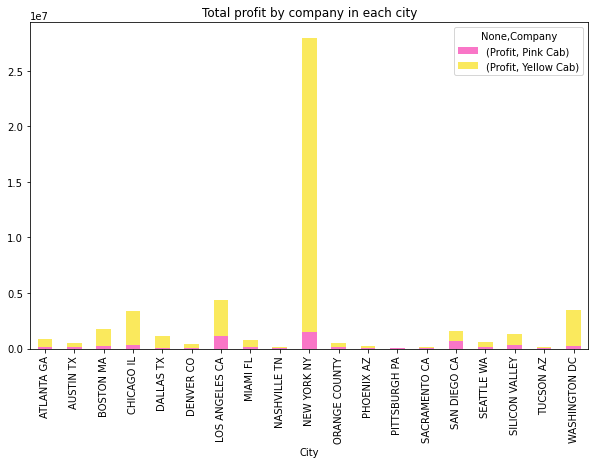

In [53]:
d = df.groupby(['Company', 'City'])['Profit'].sum().to_frame().unstack(level=0).plot(
kind='bar',
subplots=False,
title='Total profit by company in each city',
legend=True,
figsize=(10,6),
stacked=True,
color=['#F976C7', '#FAE95D'])

<AxesSubplot:title={'center':'Profit made over total by city (percentage)'}, xlabel='City'>

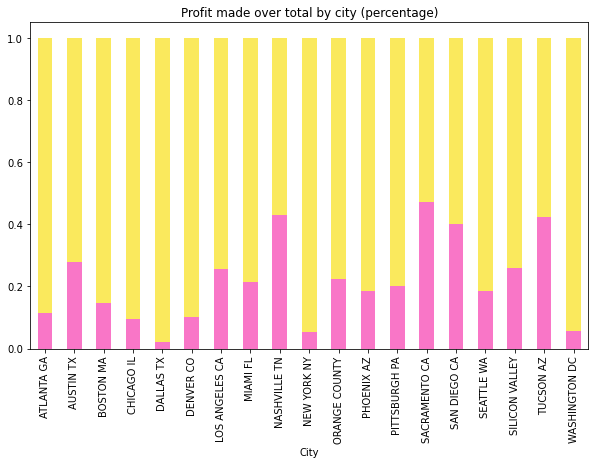

In [54]:
d = df.groupby(['Company', 'City'])['Profit'].sum() / df.groupby('City')['Profit'].sum()
d.to_frame().unstack(level=0).plot(
kind='bar',
subplots=False,
title='Profit made over total by city (percentage)',
stacked=True,
color=['#F976C7', '#FAE95D'],
legend=False,
figsize=(10,6))

We can see that most of profit made in the proposed cities goes to Yellow Cab.

- Sacramento, Nashville, Tucson and San Diego have a more balanced profit distribution (around 40-45 % for Pink cab).
- Around 80 % of profit distribution in the rest of cities falls in the Yellow Cab side.

<AxesSubplot:title={'center':'Profit per ride'}, xlabel='Company'>

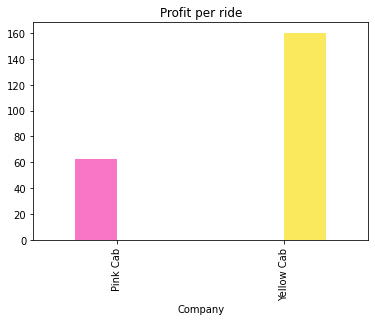

In [55]:
d = df.groupby('Company')['Profit'].sum() / df.groupby('Company')['Company'].value_counts()
d.to_frame().unstack(level=0).plot(
kind='bar',
color=['#F976C7', '#FAE95D'],
title='Profit per ride',
legend=False)

Pink Cab makes 60 USD profit per ride on average, while Yellow Cab makes 160 USD profit per ride on average (2.5 times higher).

#### <i>Rides per company</i>

<AxesSubplot:title={'center':'Total rides per company'}, xlabel='Company,Company'>

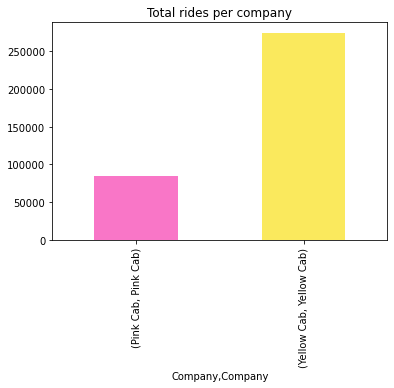

In [56]:
d = df.groupby('Company')['Company'].value_counts()
d.plot(kind='bar',
      color=['#F976C7', '#FAE95D'],
      title='Total rides per company')

In [57]:
df.Company.value_counts().to_frame()

,Company
Yellow Cab,274681
Pink Cab,84711


Almost 275k rides are run by Yellow Cab, against nearly 85k run by Pink.

<AxesSubplot:title={'center':'Rides over total by city (percentage)'}, xlabel='City'>

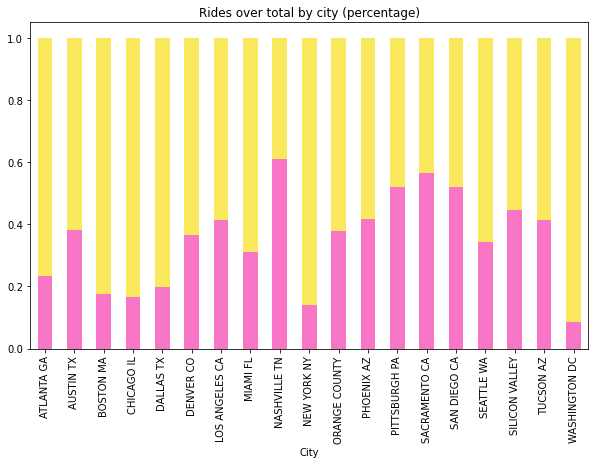

In [58]:
d = df.groupby('City')['Company'].value_counts(normalize=True)
d.to_frame().unstack().plot(
kind='bar',
subplots=False,
title='Rides over total by city (percentage)',
stacked=True,
color=['#F976C7', '#FAE95D'],
legend=False,
figsize=(10,6))

- 60 % of rides in Nashville are run by Pink Cab, followed by Sacramento, Pittsburgh and San Diego.
- The rest of cities are dominated by Yellow Cab holding between 60-70 % of total rides. In the biggest cities, like NY, Chicago, Boston, Washington it goes up to 80-90 % of rides run.

#### <i>Customer Retention</i>

In [59]:
df[df.duplicated('Customer ID')].groupby('Company').size().reset_index(name='Duplicates')

,Company,Duplicates
0,Pink Cab,69882
1,Yellow Cab,243362


#### <i>Trend along the three years</i>

In [60]:
df_sorted = df.sort_values(by='Date of Travel', ignore_index=True)
df_sorted

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Holidays,Monthly Visitors,Unemployment Rate,Avg Monthly Temperature
0,10001340,2016-01-02,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,66.6760,705749,127001,52536,Male,24,10606,Card,0,174166.67,6.2,3.0
1,10000640,2016-01-02,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,164.9960,2693976,164468,4844,Male,32,5548,Cash,0,122166.67,5.9,-5.0
2,10000635,2016-01-02,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,195.7548,2693976,164468,5671,Male,24,7081,Cash,0,122166.67,5.9,-5.0
3,10001001,2016-01-02,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,796.6140,8336817,302149,2761,Male,40,11462,Card,0,816666.67,4.9,0.5
4,10000171,2016-01-02,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,122.0660,1423851,69995,20687,Male,39,8926,Cash,0,97416.67,5.5,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10435011,2018-12-31,Yellow Cab,MIAMI FL,21.20,319.09,300.1920,18.8980,467963,17675,10967,Female,63,16390,Card,0,428083.33,3.6,22.5
359388,10433309,2018-12-31,Pink Cab,LOS ANGELES CA,10.70,128.00,119.8400,8.1600,3979576,144132,8175,Male,24,12571,Card,0,422750.00,4.3,14.5
359389,10435915,2018-12-31,Yellow Cab,SACRAMENTO CA,27.14,374.95,377.7888,-2.8388,513624,7044,45644,Male,28,23014,Card,0,18250.00,4.3,9.0
359390,10439845,2018-12-31,Yellow Cab,TUCSON AZ,27.16,513.62,361.7712,151.8488,548073,5712,40061,Male,25,3068,Cash,0,15583.33,4.8,14.0


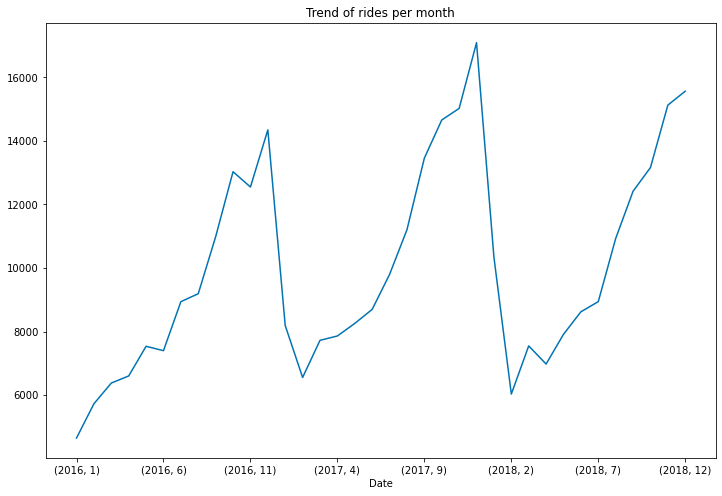

In [61]:
d = df_sorted.groupby([df_sorted['Date of Travel'].dt.year,df_sorted['Date of Travel'].dt.month])['Transaction ID'].count().to_frame().plot(
title='Trend of rides per month',
legend=False,
xlabel='Date',
figsize=(12,8))

<AxesSubplot:title={'center':'Rides per company'}, xlabel='Date', ylabel='Rides'>

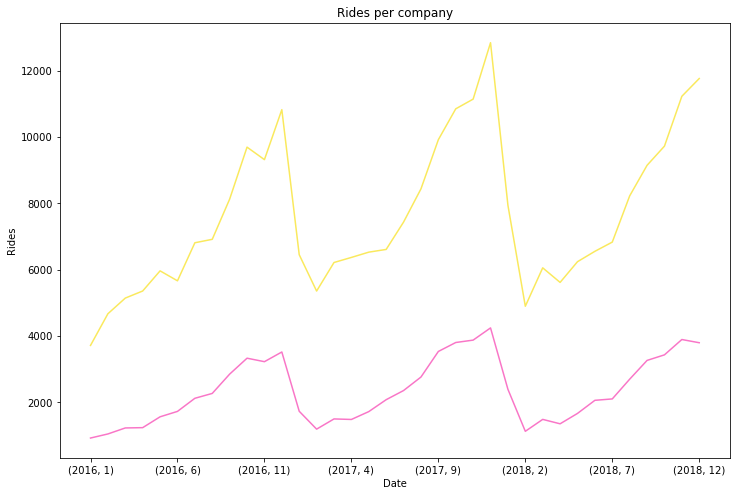

In [62]:
d = df_sorted.groupby(
    [df_sorted['Company'], df_sorted['Date of Travel'].dt.year, df_sorted['Date of Travel'].dt.month])['Transaction ID'].count().to_frame()

d.unstack(level=0).plot(figsize=(12,8),
                        color=['#F976C7', '#FAE95D'],
                        title='Rides per company',
                       xlabel='Date',
                       ylabel='Rides',
                       legend=False)

Looking at the distribution of rides along the three years we have a clear view of usage in every year. And the customer's behaviour repeats over. It rises around February, shortly after Christmas celebrations and expenses. It stabilizes a bit in spring or the beginning of summer and steeply increases from summer until the end of the year. The peak is Christmas and New Year's and sharply decreases after that until February as mentioned before.

The behaviour is very much similar for both companies, although Yellow has got more users, as we already know.

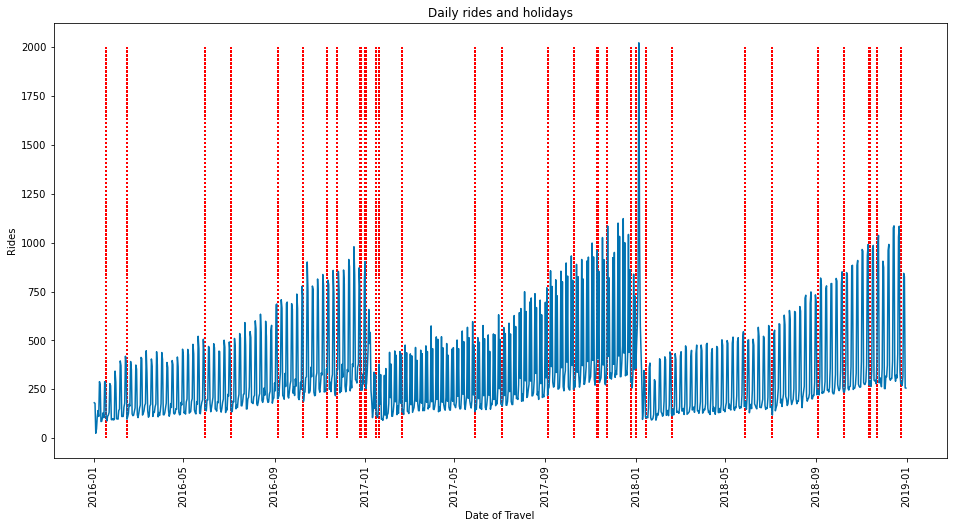

In [63]:
d = df_sorted.groupby('Date of Travel', as_index=False)['Transaction ID'].count()

plt.figure(figsize=(16,8))
sns.lineplot(x='Date of Travel', y='Transaction ID', data=d)
plt.xticks(rotation=90)
plt.title('Daily rides and holidays')
plt.ylabel('Rides')

for x in df_sorted[df_sorted['Holidays']==True]['Date of Travel']:
    plt.vlines(x=x, color='red', linestyles='dotted', ymin=0, ymax=2000)

plt.show()

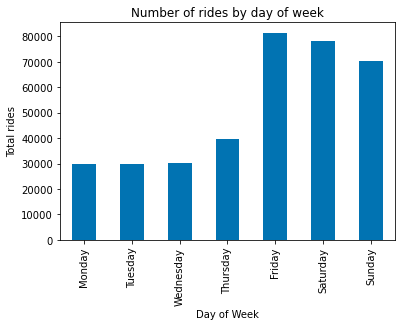

In [64]:
d = df_sorted.groupby(df_sorted['Date of Travel'].dt.dayofweek)['Transaction ID'].count().to_frame().plot(
kind='bar',
title='Number of rides by day of week',
ylabel='Total rides',
xlabel='Day of Week',
legend=False)
plt.xticks([0,1,2,3,4,5,6],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

From Monday to Wednesday, the number of rides remains the same. It starts increasing on Thursdays and Fridays double the number of rides. Fridays are the busiest days. It decreases a little bit to Saturday and then on Sunday but remains much higher than on Mondays.

#### <i>Gender differences</i>

In [65]:
df.Gender.value_counts()

Male      205912
Female    153480
Name: Gender, dtype: int64

In [66]:
df.groupby('Gender').agg({'Profit': 'sum', 'KM Travelled': 'mean'})

,Profit,KM Travelled
Gender,,
Female,2.046195e+07,22.586388
Male,2.886575e+07,22.552992


In [67]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
    z = (X1 - X2)/ovr_sigma
    pval = 2*(1 - norm.cdf(abs(z)))
    return z, pval

In [68]:
# z-test for profit generated by women and men
women_profit = df[df['Gender'] == 'Female'].loc[:,'Profit']
men_profit = df[df['Gender'] == 'Male'].loc[:,'Profit']

m1, m2 = women_profit.mean(), men_profit.mean()
sd1, sd2 = women_profit.std(), men_profit.std()
n1, n2 = women_profit.shape[0], men_profit.shape[0]

z, p = TwoSampZ(m1, m2, sd1, sd2, n1, n2)

z_score = np.round(z,8)
p_val = np.round(p,6)

if (p_val<0.05):
    Hypothesis_Status = 'Reject Null Hypothesis : Significant'
else:
    Hypothesis_Status = 'Do not reject Null Hypothesis : Not Significant'

print (p_val)
print (Hypothesis_Status)

0.0
Reject Null Hypothesis : Significant


In [69]:
df.groupby('Gender')['Payment_Mode'].value_counts(normalize=True).rename('Percentage').to_frame()

Percentage
Gender Payment_Mode            
Female Card            0.599590
       Cash            0.400410
Male   Card            0.599669
       Cash            0.400331

In [70]:
df.groupby('Gender')['Company'].value_counts(normalize=True).rename('Percentage').to_frame()

Percentage
Gender Company               
Female Yellow Cab    0.755799
       Pink Cab      0.244201
Male   Yellow Cab    0.770625
       Pink Cab      0.229375

In [71]:
df.groupby('Gender')['Age'].mean().to_frame()

,Age
Gender,
Female,35.287608
Male,35.373300


- There are 50,000 more men than women in our sample.
- Thus, the difference in average profit generated by male and female customers is statistically significant and unlikely to be due to chance.
- 60 % of the customers pay via card, without distinction between female and male customers.
- Slightly more men use Yellow than women, 77 % against 75.5 %.
- The average age is 35 years old.

#### <i>Age differences</i>

In [72]:
df.Age.describe()

count    359392.000000
mean         35.336705
std          12.594234
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: Age, dtype: float64

In [73]:
# creating categories for ages
bins = [17,29,39,49,65]

df['Age bin'] = pd.cut(df.Age, bins=bins)

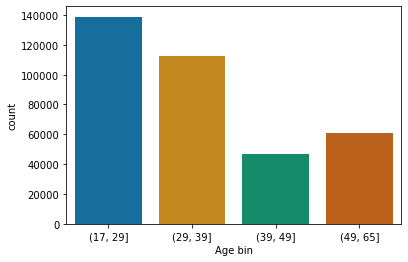

In [74]:
sns.countplot(data=df, x='Age bin')
plt.show()

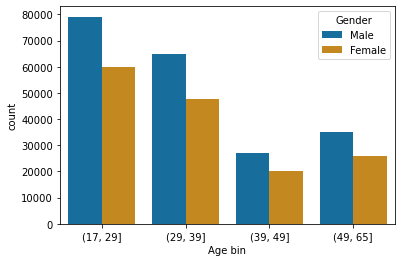

In [75]:
sns.countplot(data=df, x='Age bin', hue='Gender')
plt.show()

In [76]:
df.groupby('Age bin').agg({'Profit': 'sum', 'KM Travelled': 'mean'})

,Profit,KM Travelled
Age bin,,
"(17, 29]",1.913045e+07,22.551720
"(29, 39]",1.545774e+07,22.580063
"(39, 49]",6.541985e+06,22.589205
"(49, 65]",8.197529e+06,22.562007


In [77]:
df.groupby('Age bin')['Payment_Mode'].value_counts(normalize=True).rename('Percentage').to_frame()

Percentage
Age bin  Payment_Mode            
(17, 29] Card            0.599192
         Cash            0.400808
(29, 39] Card            0.598838
         Cash            0.401162
(39, 49] Card            0.599804
         Cash            0.400196
(49, 65] Card            0.601994
         Cash            0.398006

In [78]:
df.groupby('Age bin')['Company'].value_counts(normalize=True).rename('Percentage').to_frame()

Percentage
Age bin  Company               
(17, 29] Yellow Cab    0.762600
         Pink Cab      0.237400
(29, 39] Yellow Cab    0.765752
         Pink Cab      0.234248
(39, 49] Yellow Cab    0.767510
         Pink Cab      0.232490
(49, 65] Yellow Cab    0.762970
         Pink Cab      0.237030

- The distribution for ages is clearly split in two: people under 40 years old, and people older than 40 years old. The former group is more numerous.
- There are no other differences detected in age groups: the average distance travelled is 22.5 KM, 60 % use card as payment mode, 76 % use Yellow Cab.

#### <i>Monthly Visitors</i>

<AxesSubplot:ylabel='City'>

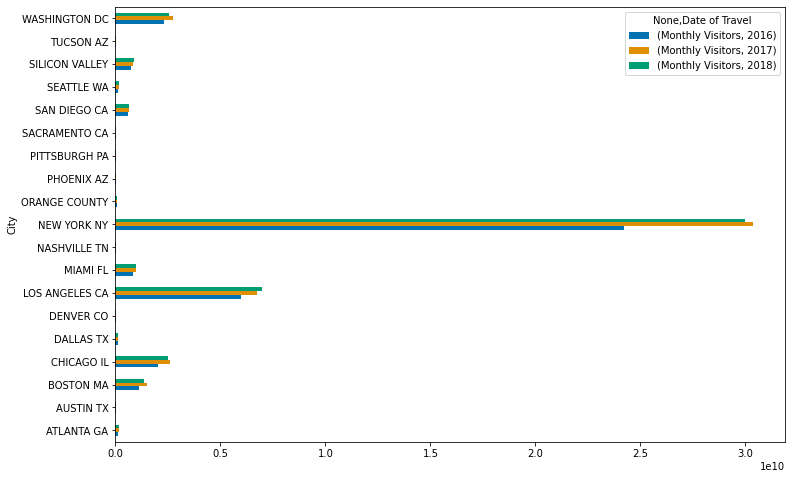

In [79]:
df.groupby([df['Date of Travel'].dt.year, 'City'])['Monthly Visitors'].sum().to_frame().unstack(level=0).plot(
kind='barh',
figsize=(12,8))

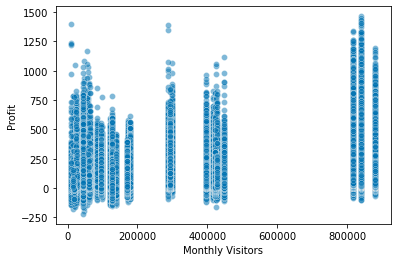

In [80]:
sns.scatterplot(x=df['Monthly Visitors'], y=df['Profit'], alpha=.5)
plt.show()

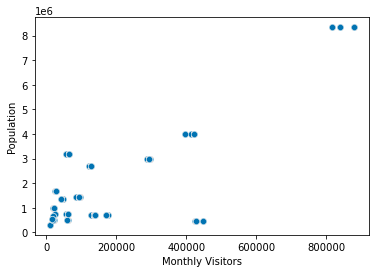

In [81]:
sns.scatterplot(x=df['Monthly Visitors'], y=df['Population'], alpha=.5)
plt.show()

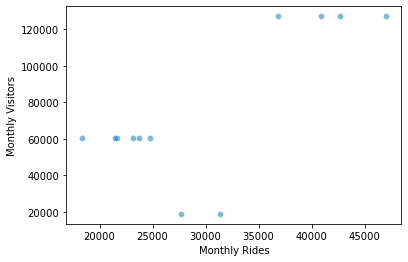

In [82]:
d = df.groupby(df['Date of Travel'].dt.month, as_index=False)['Transaction ID'].count()
sns.scatterplot(x=d['Transaction ID'], y=df['Monthly Visitors'], alpha=.5)
plt.xlabel('Monthly Rides')
plt.show()

- There is a positive correlation between monthly visitors and profit and visitors and population.

#### <i>Unemployment rate</i>

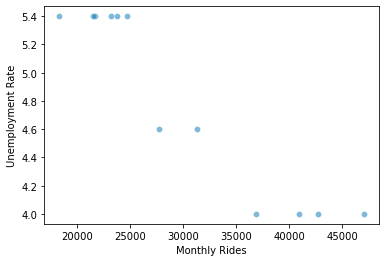

In [83]:
d = df.groupby(df['Date of Travel'].dt.month, as_index=False)['Transaction ID'].count()
sns.scatterplot(x=d['Transaction ID'], y=df['Unemployment Rate'], alpha=.5)
plt.xlabel('Monthly Rides')
plt.show()

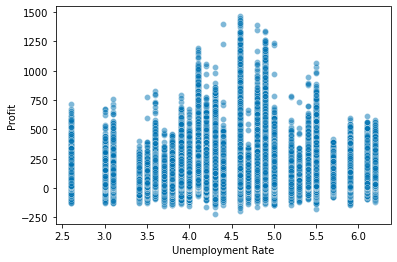

In [84]:
sns.scatterplot(x=df['Unemployment Rate'], y=df['Profit'], alpha=.5)
plt.show()

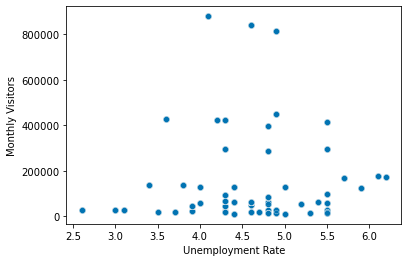

In [85]:
sns.scatterplot(x=df['Unemployment Rate'], y=df['Monthly Visitors'], alpha=.5)
plt.show()

- There is a negative correlation between monthly rides and unemployment rate, maybe due to numerous visitors in bigger cities holding a lower unemployment rate.

#### <i>Average Temperature</i>

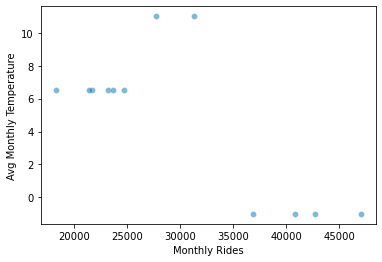

In [86]:
d = df.groupby(df['Date of Travel'].dt.month, as_index=False)['Transaction ID'].count()
sns.scatterplot(x=d['Transaction ID'], y=df['Avg Monthly Temperature'], alpha=.5)
plt.xlabel('Monthly Rides')
plt.show()

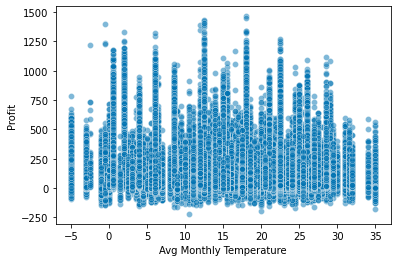

In [87]:
sns.scatterplot(x=df['Avg Monthly Temperature'], y=df['Profit'], alpha=.5)
plt.show()

In [88]:
df.groupby('City').agg({'Transaction ID': 'count', 'Avg Monthly Temperature': 'mean', 'Unemployment Rate': 'mean'}).sort_values('Transaction ID', ascending=False)

,Transaction ID,Avg Monthly Temperature,Unemployment Rate
City,,,
NEW YORK NY,99885,13.323807,4.518328
CHICAGO IL,56625,10.291797,5.059322
LOS ANGELES CA,48033,19.424781,4.838636
WASHINGTON DC,43737,15.594417,5.992174
BOSTON MA,29692,11.464570,3.724956
SAN DIEGO CA,20488,18.832219,4.835723
SILICON VALLEY,8519,14.800622,4.835967
SEATTLE WA,7997,11.932162,4.714718
ATLANTA GA,7557,18.134908,4.701416


- It looks like larger cities tend to have lower temperatures in average.

## Conclusions

- There are no big differences between genders and ages, except for the profit generated by men and women. The former generate higher profit on average.
- The added attributes seem to have some correlation with profit and may be interesting to examine their explanatory power in modelling.
- In our sample, there are 50,000 more men than women, and people aged under 40 is more numerous.
- The growth in cab usage is constant along the year, reaching the peak at the end of the year (Christmas and New Year's celebrations).
- At a week level, weekends are the busiest days.
- Yellow Cab takes the lead almost everywhere and in every examined factor. Tipically, the larger the city, the bigger the advantage is.
- According to the data we have analysed, it is recommended to invest in Yellow Cab, since it surpasses Pink Cab in almost all factors examined. It is still pending to work on forecast for the next months.